# MLOPS Zoomcamp
## Homework #1
### For j.kent.campbell@gm...

In [1]:
!python -V

Python 3.7.13


In [2]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('./fhv_tripdata_2021-01.parquet')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        float64       
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 61.6+ MB


In [5]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,NaN,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,NaN,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,NaN,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,NaN,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,NaN,B00037


## Q1

In [6]:
df.shape

(1154112, 7)

Q1 Answer: 1154112

## Q2

In [7]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime

In [8]:
df.duration.mean()

Timedelta('0 days 00:19:10.033445627')

In [9]:
10/60

0.16666666666666666

Q2 Answer: 19.16

## Q3

In [10]:
df['duration_minutes'] = df['duration'].dt.total_seconds()/60
df = df[(df['duration_minutes'] >= 1) & (df['duration_minutes'] <= 60)]

In [11]:
df.shape

(1109826, 9)

In [12]:
#dropped
1154112-1109826

44286

In [13]:
df[['PUlocationID', 'DOlocationID']] = df[['PUlocationID', 'DOlocationID']].fillna('-1')

In [14]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration,duration_minutes
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1,-1,NaN,B00009,0 days 00:17:00,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1,-1,NaN,B00009,0 days 00:17:00,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1,72.0,NaN,B00037,0 days 00:08:17,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1,61.0,NaN,B00037,0 days 00:15:13,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1,71.0,NaN,B00037,0 days 00:09:03,9.050000


In [15]:
df[df['PUlocationID'] == '-1'].shape

(927008, 9)

In [16]:
(927008/1109826)*100

83.52732770722618

Q3 Answer: 83%

## Q4

In [17]:
categorical = ['PUlocationID', 'DOlocationID']

df[categorical] = df[categorical].astype(str)

In [18]:
train_dicts = df[categorical].to_dict(orient='records')

In [19]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [20]:
X_train.shape

(1109826, 525)

Q4 Answer: 525

## Q5

In [21]:
target = 'duration_minutes'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107207368

Q5 Answer: 10.53

/Users/kent/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kent/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


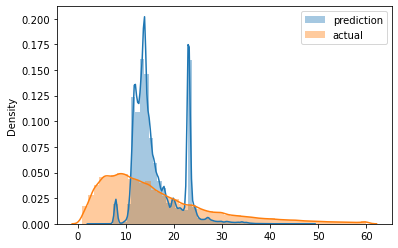

In [22]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

## Q6

In [23]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
        
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df['duration_minutes'] = df['duration'].dt.total_seconds()/60
    df = df[(df['duration_minutes'] >= 1) & (df['duration_minutes'] <= 60)]
    
    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [24]:
df_train = read_dataframe('./fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('./fhv_tripdata_2021-02.parquet')

In [25]:
categorical = ['PUlocationID', 'DOlocationID']
val_dicts = df[categorical].to_dict(orient='records')

In [26]:
dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [27]:
target = 'duration_minutes'
y_train = df_train[target].values
y_val = df_val[target].values

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.014283121278247

Q6 Answer: 11.01